In [5]:
import numpy as np
from numpy.linalg import lstsq, svd 
from numpy.random import rand, randn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

<IPython.core.display.Javascript object>


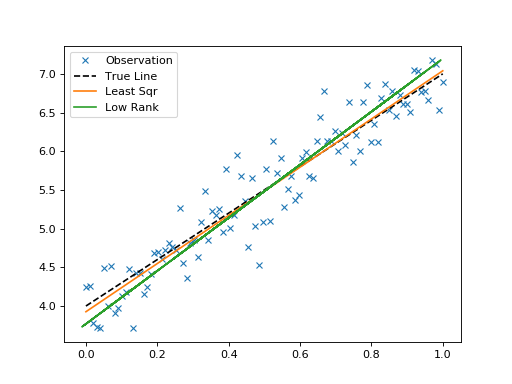

In [6]:
N = 100
a, b = 3, 4
noiseVar = 0.1

x = np.linspace(0,1,N)
f = a*x + b
y = f + np.sqrt(noiseVar)*randn(N)

# least-squares estimate
A_ls = np.vstack((x,np.ones(N))).T
coeff = lstsq(A_ls,y,rcond=None)[0]
y_ls = A_ls@coeff

# low-rank estimate
rank = 1
A_lr = np.vstack((x - np.mean(x),y - np.mean(y))).T
u, s, vh = svd(A_lr,full_matrices=False)
B = (u[:,:rank]*s[:rank])@vh[:rank,:]

x_lr = B[:,0] + np.mean(x)
y_lr = B[:,1] + np.mean(y)

fig = plt.figure()
plt.plot(x,y,'x',label="Observation")
plt.plot(x,f,'k--',label="True Line")
plt.plot(x,y_ls,label="Least Sqr")
plt.plot(x_lr, y_lr,label="Low Rank")
plt.legend();

<IPython.core.display.Javascript object>


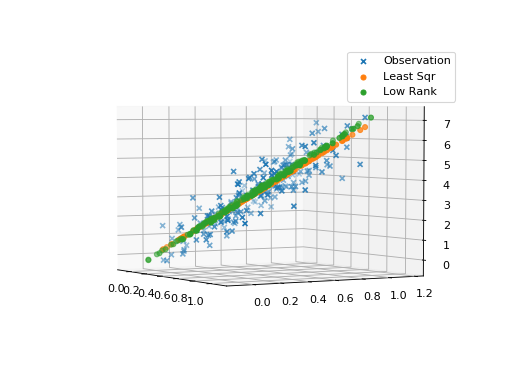

In [7]:
# Compare LS and Low Rank in 2D
N = 200
w = np.array([3, 4])
noiseVar = 0.5

x = rand(N,2)
y = x@w + np.sqrt(noiseVar)*randn(N)
y = y[..., None]
# least-squares estimate
A_ls = np.append(x,np.ones((N,1)),1)
coeff = lstsq(A_ls,y,rcond=None)[0]
y_ls = A_ls@coeff

# low-rank estimate
rank = 2
A_lr = np.append(x,y,1)

u, s, vh = svd(A_lr,full_matrices=False)
xHat = (u[:,:rank]*s[:rank])@vh[:rank,:]

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x[:,0], x[:,1], y, marker='x', label="Observation")
ax1.scatter(x[:,0], x[:,1], y_ls, label="Least Sqr")
ax1.scatter(xHat[:,0], xHat[:,1], xHat[:,2], label="Low Rank")
ax1.legend();